In [256]:
%matplotlib inline
%pip install scipy

import piplite
await piplite.install('seaborn')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [257]:
data = pd.read_csv('data.csv')

In [258]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#### Общая информация о данных

In [259]:
data.shape

(5110, 12)

In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 379.3+ KB


In [261]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,5110.0,NaN,NaN,NaN,36517.829354,21161.721625,67.0,17741.25,36932.0,54682.0,72940.0
gender,5110,3,Female,2994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,5110.0,NaN,NaN,NaN,43.226614,22.612647,0.08,25.0,45.0,61.0,82.0
hypertension,5110.0,NaN,NaN,NaN,0.097456,0.296607,0.0,0.0,0.0,0.0,1.0
heart_disease,5110.0,NaN,NaN,NaN,0.054012,0.226063,0.0,0.0,0.0,0.0,1.0
ever_married,5110,2,Yes,3353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,5110,5,Private,2925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residence_type,5110,2,Urban,2596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,5110.0,NaN,NaN,NaN,106.147677,45.28356,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,NaN,NaN,NaN,28.893237,7.854067,10.3,23.5,28.1,33.1,97.6


In [262]:
data['age'].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

#### Соотношение мужчин и женщин в выборке

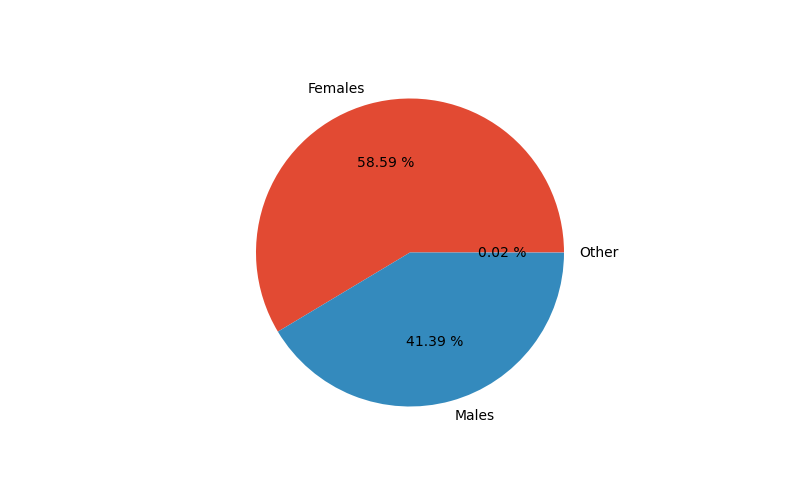

<Figure size 800x500 with 0 Axes>

In [263]:
females = data.loc[data['gender'] == 'Female'].count()[0]
males = data.loc[data['gender'] == 'Male'].count()[0]
other = data.loc[data['gender'] == 'Other'].count()[0]

plt.figure(figsize=(8,5))
labels = ['Females', 'Males', 'Other']
plt.pie([females, males, other], labels = labels,autopct='%.2f %%')
plt.show()

#### Анализ количественной информации по возрасту

<AxesSubplot:>

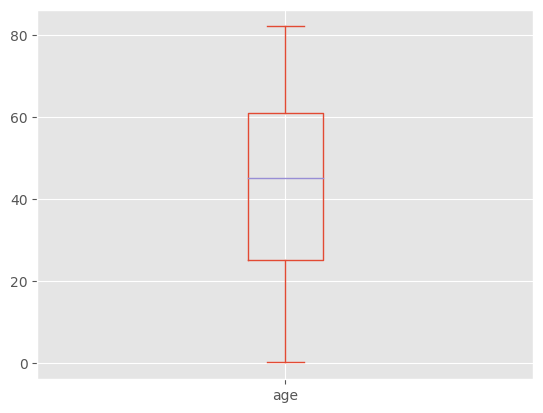

In [264]:
data['age'].plot(kind='box')

In [265]:
IQR = np.quantile(data['age'], 0.75) - np.quantile(data['age'], 0.25)

In [266]:
IQR

36.0

In [267]:
np.quantile(data['age'], 0.75), np.quantile(data['age'], 0.25)

(61.0, 25.0)

#### Медианное значение возраста в выборке равно 45 лет и совпадает с 50-ым квантилем

In [268]:
np.quantile(data['age'], 0.5) == data['age'].median(), np.quantile(data['age'], 0.5)

(True, 45.0)

In [269]:
data['age'].min(), data['age'].max()

(0.08, 82.0)

#### Распределение пациентов по возрасту

<AxesSubplot:>

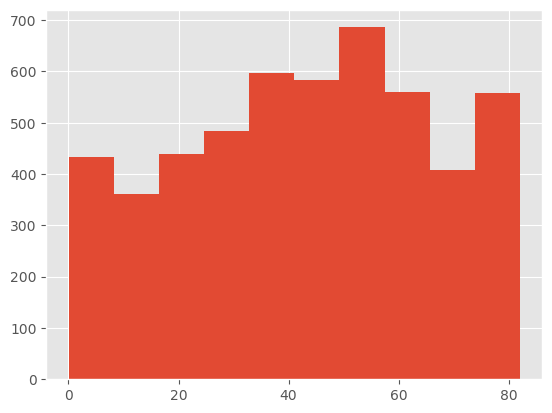

In [270]:
data['age'].hist()

#### Сглаженное распределение пациентов по возрасту

<AxesSubplot:ylabel='Density'>

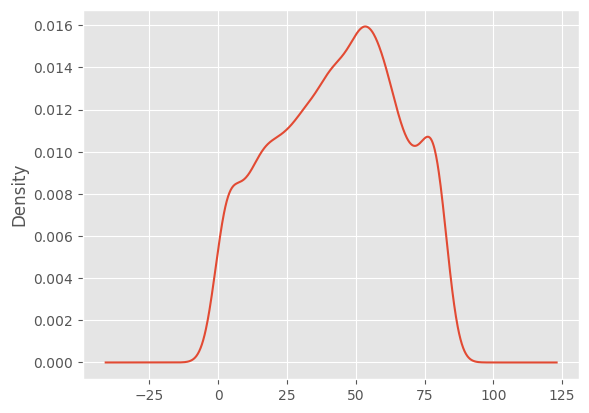

In [271]:
data['age'].plot(kind='kde')

#### Медиана показана белой точкой

<AxesSubplot:ylabel='age'>

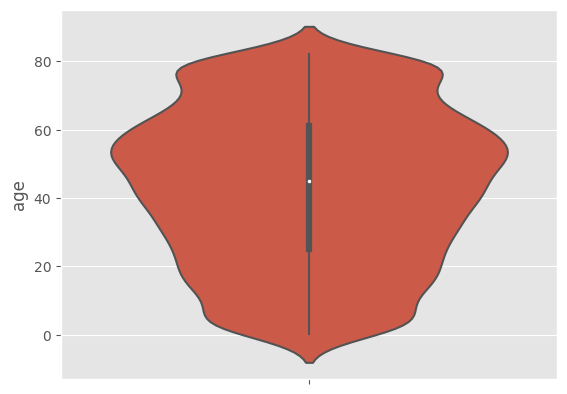

In [272]:
sns.violinplot(y = 'age', data = data)

#### Место проживания почти никак не влияет на риск инсульта

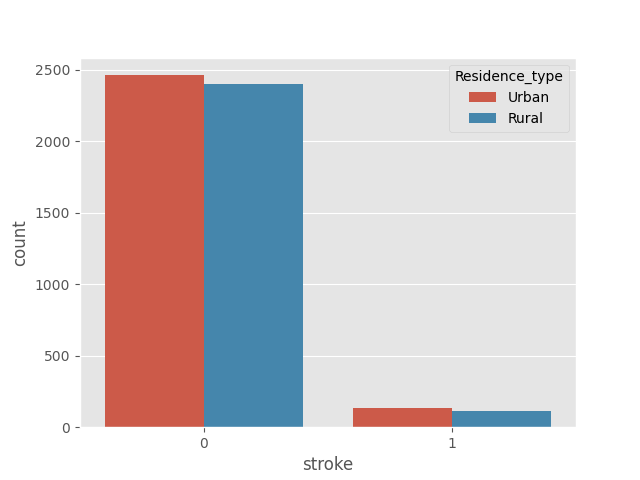

<Figure size 640x480 with 0 Axes>

In [273]:
sns.countplot(x='stroke',hue='Residence_type',data=data)
plt.show()

#### Распределение видов работы данной выборки

In [274]:
data['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

<AxesSubplot:xlabel='work_type', ylabel='count'>

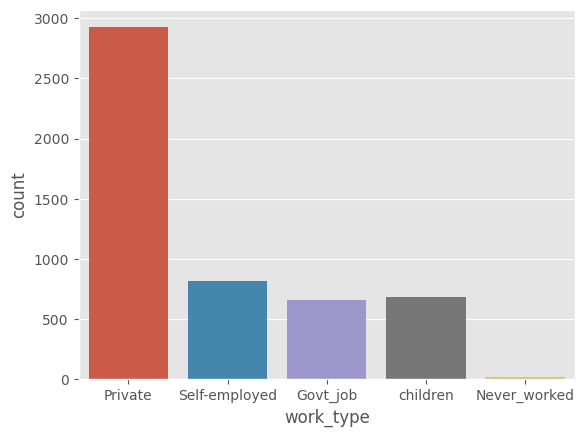

In [275]:
sns.countplot(x = 'work_type', data = data)

In [276]:
data['Y'] = data['stroke'] > 0

<AxesSubplot:xlabel='work_type', ylabel='count'>

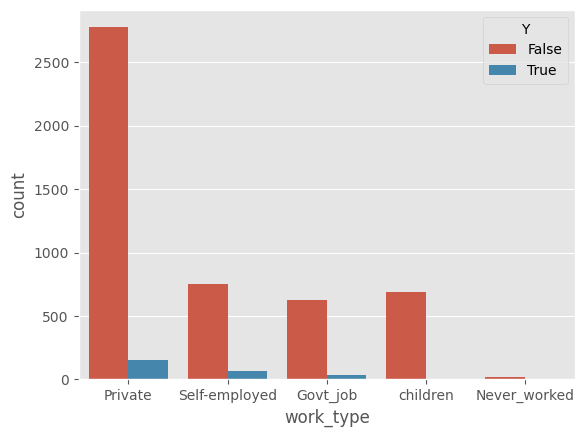

In [277]:
sns.countplot(x = 'work_type', hue = 'Y', data = data)

In [278]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Y
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,True
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,True
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,True
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,True
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,False
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,False
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,False
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,False


#### Как видно из графиков риск инусльта существует у более возрастных пациентов

<AxesSubplot:xlabel='age', ylabel='Count'>

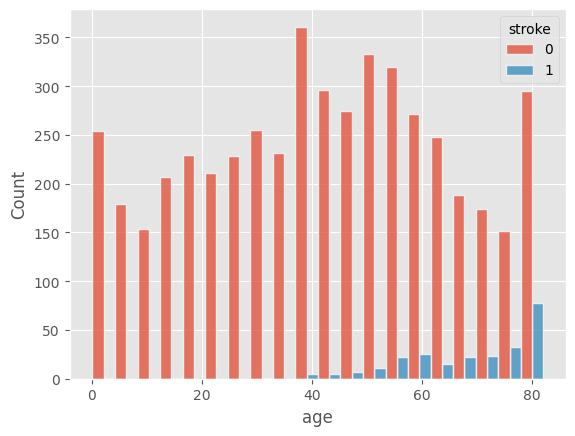

In [279]:
sns.histplot(x='age',data=data,hue='stroke',linewidth=1,multiple='dodge')

<AxesSubplot:xlabel='Y', ylabel='age'>

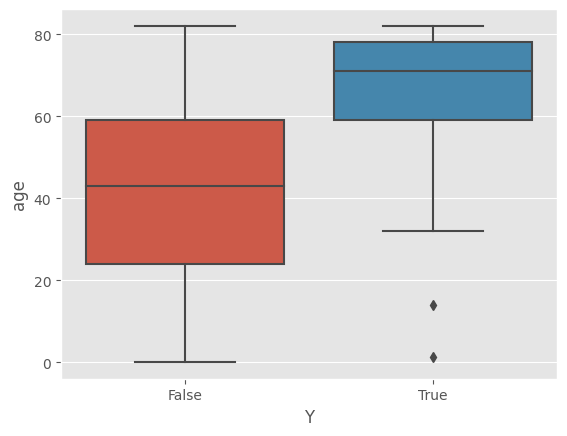

In [280]:
sns.boxplot(x = 'Y', y = 'age', data = data)

#### Анализ зависимости признаков между собой

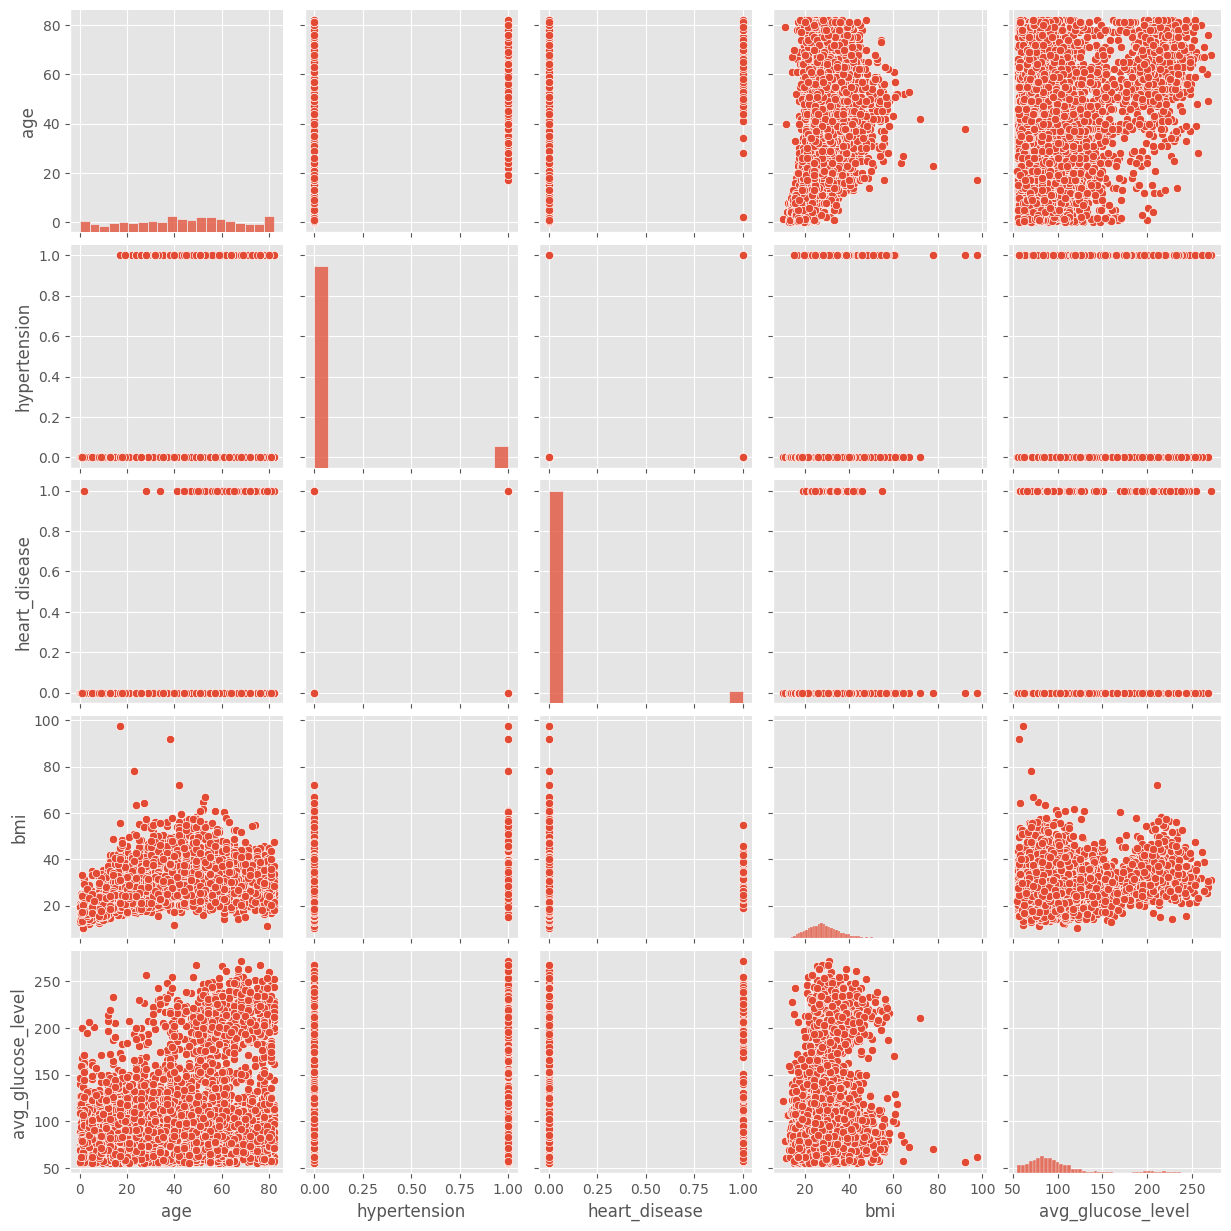

In [281]:
sns.pairplot(data[['age', 'hypertension', 'heart_disease', 'bmi', 'avg_glucose_level']])

#### Как видно существует определенная корреляция между индексом массы тела и возрастом.

In [282]:
corr = data[['age', 'hypertension', 'heart_disease', 'bmi', 'avg_glucose_level']].corr()

In [283]:
corr

,age,hypertension,heart_disease,bmi,avg_glucose_level
age,1.000000,0.276398,0.263796,0.333398,0.238171
hypertension,0.276398,1.000000,0.108306,0.167811,0.174474
heart_disease,0.263796,0.108306,1.000000,0.041357,0.161857
bmi,0.333398,0.167811,0.041357,1.000000,0.175502
avg_glucose_level,0.238171,0.174474,0.161857,0.175502,1.000000


In [284]:
corr['age']

age                  1.000000
hypertension         0.276398
heart_disease        0.263796
bmi                  0.333398
avg_glucose_level    0.238171
Name: age, dtype: float64

<AxesSubplot:>

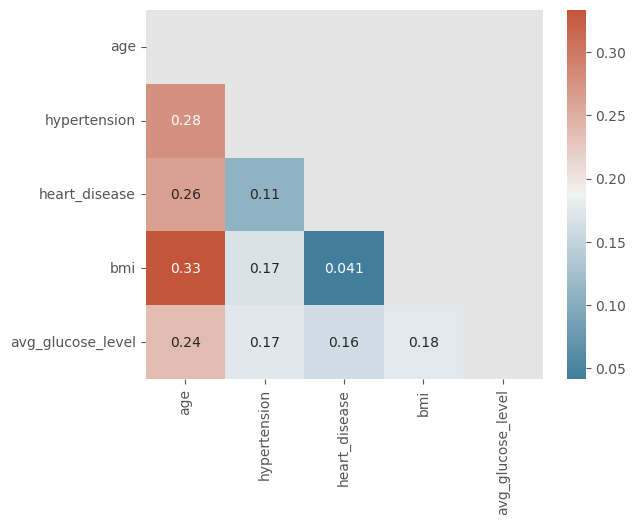

In [285]:
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,annot=True,mask=mask, cmap=cmap)

#### Исходя из графиков нахождение в браке немного увеличивает риск возникновения инсульта, особенно у пожилых людей.

<AxesSubplot:xlabel='ever_married', ylabel='age'>

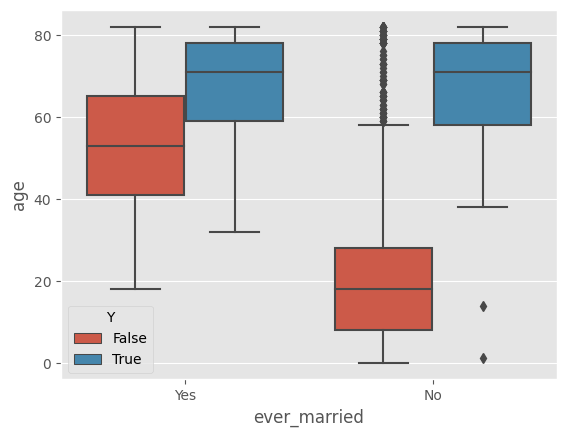

In [286]:
sns.boxplot(x='ever_married', y='age', hue='Y', data=data)

<AxesSubplot:xlabel='ever_married', ylabel='count'>

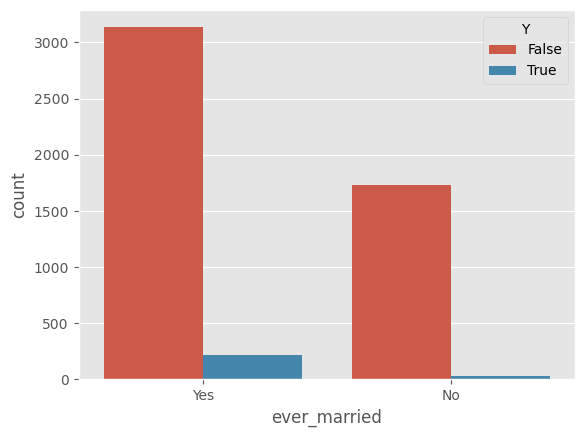

In [287]:
sns.countplot(x = 'ever_married', hue = 'Y', data = data)